# Support Vector Machine

Advantages of support vector machines:

    1.Effective in high dimensional spaces.
    2.Still effective in cases where number of dimensions is greater than the number of samples.
    3.Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
    3.Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided,but it is also possible to specify custom kernels.
Disadvantages:
    1.If the number of features is much greater than the number of samples, the method is likely to give poor performances.
    2.SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

# 1 SVM wih Scikit learn

In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
from sklearn import datasets

In [73]:
iris = datasets.load_iris()

X= iris.data
Y= iris.target

In [74]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [75]:
from sklearn.svm import SVC

In [76]:
model = SVC()

In [77]:
from sklearn.cross_validation import train_test_split

In [78]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [79]:
model.fit(x_train,y_train) #fit with features with target

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
# How well our model is

In [81]:
from sklearn import metrics

In [82]:
predicted = model.predict(x_test)
expected_result = y_test

In [83]:
print metrics.accuracy_score(expected_result,predicted)

0.966666666667


Now that we've gone through a basic implementation of SVM lets go ahead and quickly explore the various kernel types we can use for classification. We can do this by plotting out the boundaries created by each kernel type! We'll start with some imports and by setting up the data.

The four methods we will explore are two linear models, a Gaussian Radial Basis Function,and a SVC with a polynomial (3rd Degree) kernel.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

    1.LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
    2.LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

In [84]:
from sklearn import svm

In [85]:
X = iris.data[:,:2] #select only first two features
Y = iris.target

In [86]:
# SVM regularization parameter
C =1.0 

In [87]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [88]:
# Gaussaian Radial Basis Function
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [89]:
# Third degree poly fit
poly_svc = svm.SVC(kernel='poly',degree=3, C=C).fit(X,Y)

In [90]:
# Linear FIt
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

First we define a mesh to plot in. We define the max and min of the plot for the y and x axis by the smallest and larget features in the data set. We can use numpy's built in mesh grid method to construct our plot.

In [91]:
# set up step size

h =0.02

x_min = X[:,0].min()-1  #min of features of first column
x_max = X[:,0].max()+1  #max of features of first column

y_min = X[:,0].min()-1
y_max = X[:,0].max()+1



In [92]:
# meshgrid from numpy
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [94]:
# Plottings
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


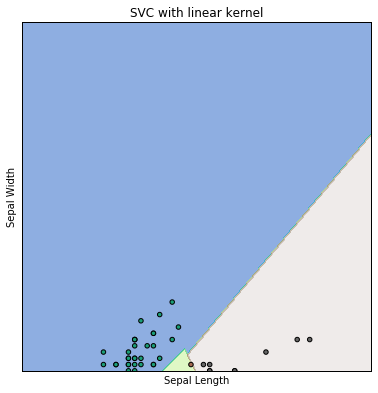

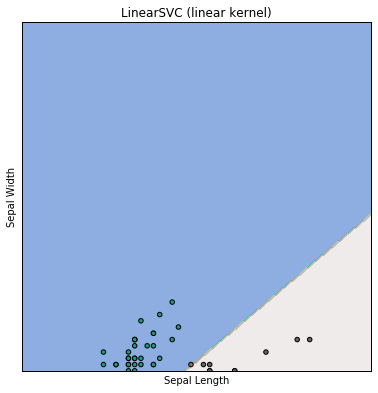

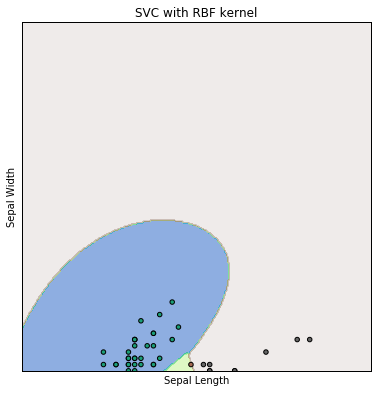

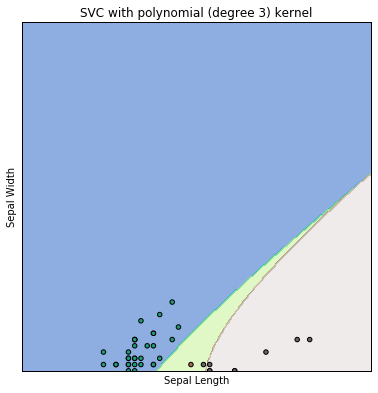

In [98]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
#     plot decision boundary
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
#     space between two plots
    plt.subplots_adjust(wspace=0.4,hspace=0.4)  
    
#     Define Z as predcition
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
#  result into color plot
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap =plt.cm.terrain,alpha=0.5,linewidths =0)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap =plt.cm.Dark2)
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
    

    